In [2]:
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText
import numpy as np
import matplotlib.pyplot as plt
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

%matplotlib inline

Using TensorFlow backend.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import re
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in en_stop]
        tokens = [word for word in tokens if len(word) > 3]

        preprocessed_text = ' '.join(tokens)

        return preprocessed_text

In [4]:
import re
with open("C:/Users/lenovo/Desktop/Dataoa2.txt") as f2:
    data = f2.read()
    L = data.split(', ')
print(L[:10])

["['GETTING'", "'STARTED'", "'WITH'", "'DATA'", "'SCIENCE'", "'What'", "'is'", "'data'", "'science'", "'Data'"]


In [5]:

final_corpus = [preprocess_text(sentence) for sentence in L if sentence.strip() !='']

word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(sent) for sent in final_corpus]

In [6]:
print(word_tokenized_corpus[0:100])

[['getting'], ['started'], [], ['data'], ['science'], [], [], ['data'], ['science'], ['data'], ['science'], ['company'], ['getting'], [], ['skill'], ['building', 'portfoliofinding'], [], ['data'], ['science'], [], [], ['search'], ['identifying'], [], ['right'], [], [], ['application'], ['résumés', 'cover'], ['letter'], [], ['interview'], ['expect', 'handle'], ['offer'], ['knowing'], ['acceptsettling'], [], ['data'], ['science'], [], ['first'], ['month'], [], ['making'], [], ['effective'], ['analysis'], ['deploying', 'model'], [], ['production'], ['working'], [], ['stakeholdersgrowing'], ['data'], ['science'], ['role'], [], [], ['data'], ['science'], ['project'], ['fails'], ['joining'], [], ['data'], ['science'], ['community'], ['leaving'], [], [], ['gracefully'], ['moving'], [], [], ['ladder'], ['contentspreface'], ['xvii'], ['acknowledgment'], [], [], [], ['book'], [], [], [], ['author'], ['xxivabout'], [], ['cover'], ['illustration'], ['xxviigetting'], ['started'], [], ['data'], ['sc

In [7]:
LAST = str(word_tokenized_corpus).replace("[]","").replace(" , ","").replace("'","").replace(",,",",")
print(LAST)
O = LAST.split(", ")
#print(O)


[[getting], [started],[data], [science], [data], [science], [data], [science], [company], [getting],[skill], [building, portfoliofinding],[data], [science], [search], [identifying],[right], [application], [résumés, cover], [letter],[interview], [expect, handle], [offer], [knowing], [acceptsettling],[data], [science],[first], [month],[making],[effective], [analysis], [deploying, model],[production], [working],[stakeholdersgrowing], [data], [science], [role], [data], [science], [project], [fails], [joining],[data], [science], [community], [leaving], [gracefully], [moving], [ladder], [contentspreface], [xvii], [acknowledgment],[book],[author], [xxivabout],[cover], [illustration], [xxviigetting], [started],[data], [sciencewhat],[data], [sciencewhat],[data], [sciencemathematics, statistic], [database, programmingbusiness], [understandingdifferent], [type, data], [science], [jobsanalytics], [machine], [learning], [decision], [sciencerelated], [jobschoosing],[pathinterview],[robert], [chang],

In [8]:
def my_function(x):
  return list(dict.fromkeys(x))

mylist = my_function(O)
print(mylist)

['[[getting]', '[started],[data]', '[science]', '[data]', '[company]', '[getting],[skill]', '[building', 'portfoliofinding],[data]', '[search]', '[identifying],[right]', '[application]', '[résumés', 'cover]', '[letter],[interview]', '[expect', 'handle]', '[offer]', '[knowing]', '[acceptsettling],[data]', '[science],[first]', '[month],[making],[effective]', '[analysis]', '[deploying', 'model],[production]', '[working],[stakeholdersgrowing]', '[role]', '[project]', '[fails]', '[joining],[data]', '[community]', '[leaving]', '[gracefully]', '[moving]', '[ladder]', '[contentspreface]', '[xvii]', '[acknowledgment],[book],[author]', '[xxivabout],[cover]', '[illustration]', '[xxviigetting]', '[sciencewhat],[data]', '[sciencemathematics', 'statistic]', '[database', 'programmingbusiness]', '[understandingdifferent]', '[type', 'data]', '[jobsanalytics]', '[machine]', '[learning]', '[decision]', '[sciencerelated]', '[jobschoosing],[pathinterview],[robert]', '[chang]', '[scientist],[airbnbwhat]', '

In [9]:
def extractDigits(lst): 
    res = [] 
    for el in lst: 
        sub = el.split(', ') 
        res.append(sub) 
      
    return(res)        
V = extractDigits(O)
print(V[:10])

[['[[getting]'], ['[started],[data]'], ['[science]'], ['[data]'], ['[science]'], ['[data]'], ['[science]'], ['[company]'], ['[getting],[skill]'], ['[building']]


In [10]:
embedding_size = 50
window_size = 5

In [11]:
%%time
ft_model = FastText(V,
                      size=embedding_size,
                      window=window_size,
                      iter=100)

Wall time: 11.1 s


In [16]:
semantically_similar_words = {words: [item[0] for item in ft_model.wv.most_similar([words], topn=10)]
                  for words in ['data','dog','author','machine','learning', 'network']}
for k,v in semantically_similar_words.items():
    print(k+":"+str(v).replace("[","").replace("]","").replace(" , ","").replace("'","").replace(",,",","))
    print(" ")


data:data, hope, part, sharing, data, figure, result, design, sign, advice
 
dog:skill, million, upon, model, find, consistency, rather, organization, easy, used
 
author:author, together, knowing, test, work, task, mngbz, schedule, work, fully
 
machine:machine, world, world, track, good, data, slow, machine, building, system
 
learning:learning, learning, learning, learn, review, deploying, past, department, running, deploy
 
network:network, cloud, extra, know, problem, rate, function, come, common, common
 


In [247]:
print(ft_model.wv.similarity(w1='data', w2='science'))


0.04075104


In [124]:
from sklearn.decomposition import PCA

all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

print(all_similar_words)
print(type(all_similar_words))
print(len(all_similar_words))

['artificial', "'benefit'", "'fail'", "'media'", "'mean'", "'extra'", 'intelligence', "'intelligence'", "'just'", "'how' 'do'", "'feature'", "'people' 'the'", 'machine', "'machine'", "'Machine'", "'machines'", "'experimentation'", "'information'", 'network', "'network'", "'networking'", "'networks'", "'decided'", "'wanted'", 'recurrent', "'current'", "'currently'", "'look'", "'library'", "'frequently'", 'deep', "'relationships'", "'improvement'", "'amount'", "'at'", "'months'"]
<class 'list'>
36


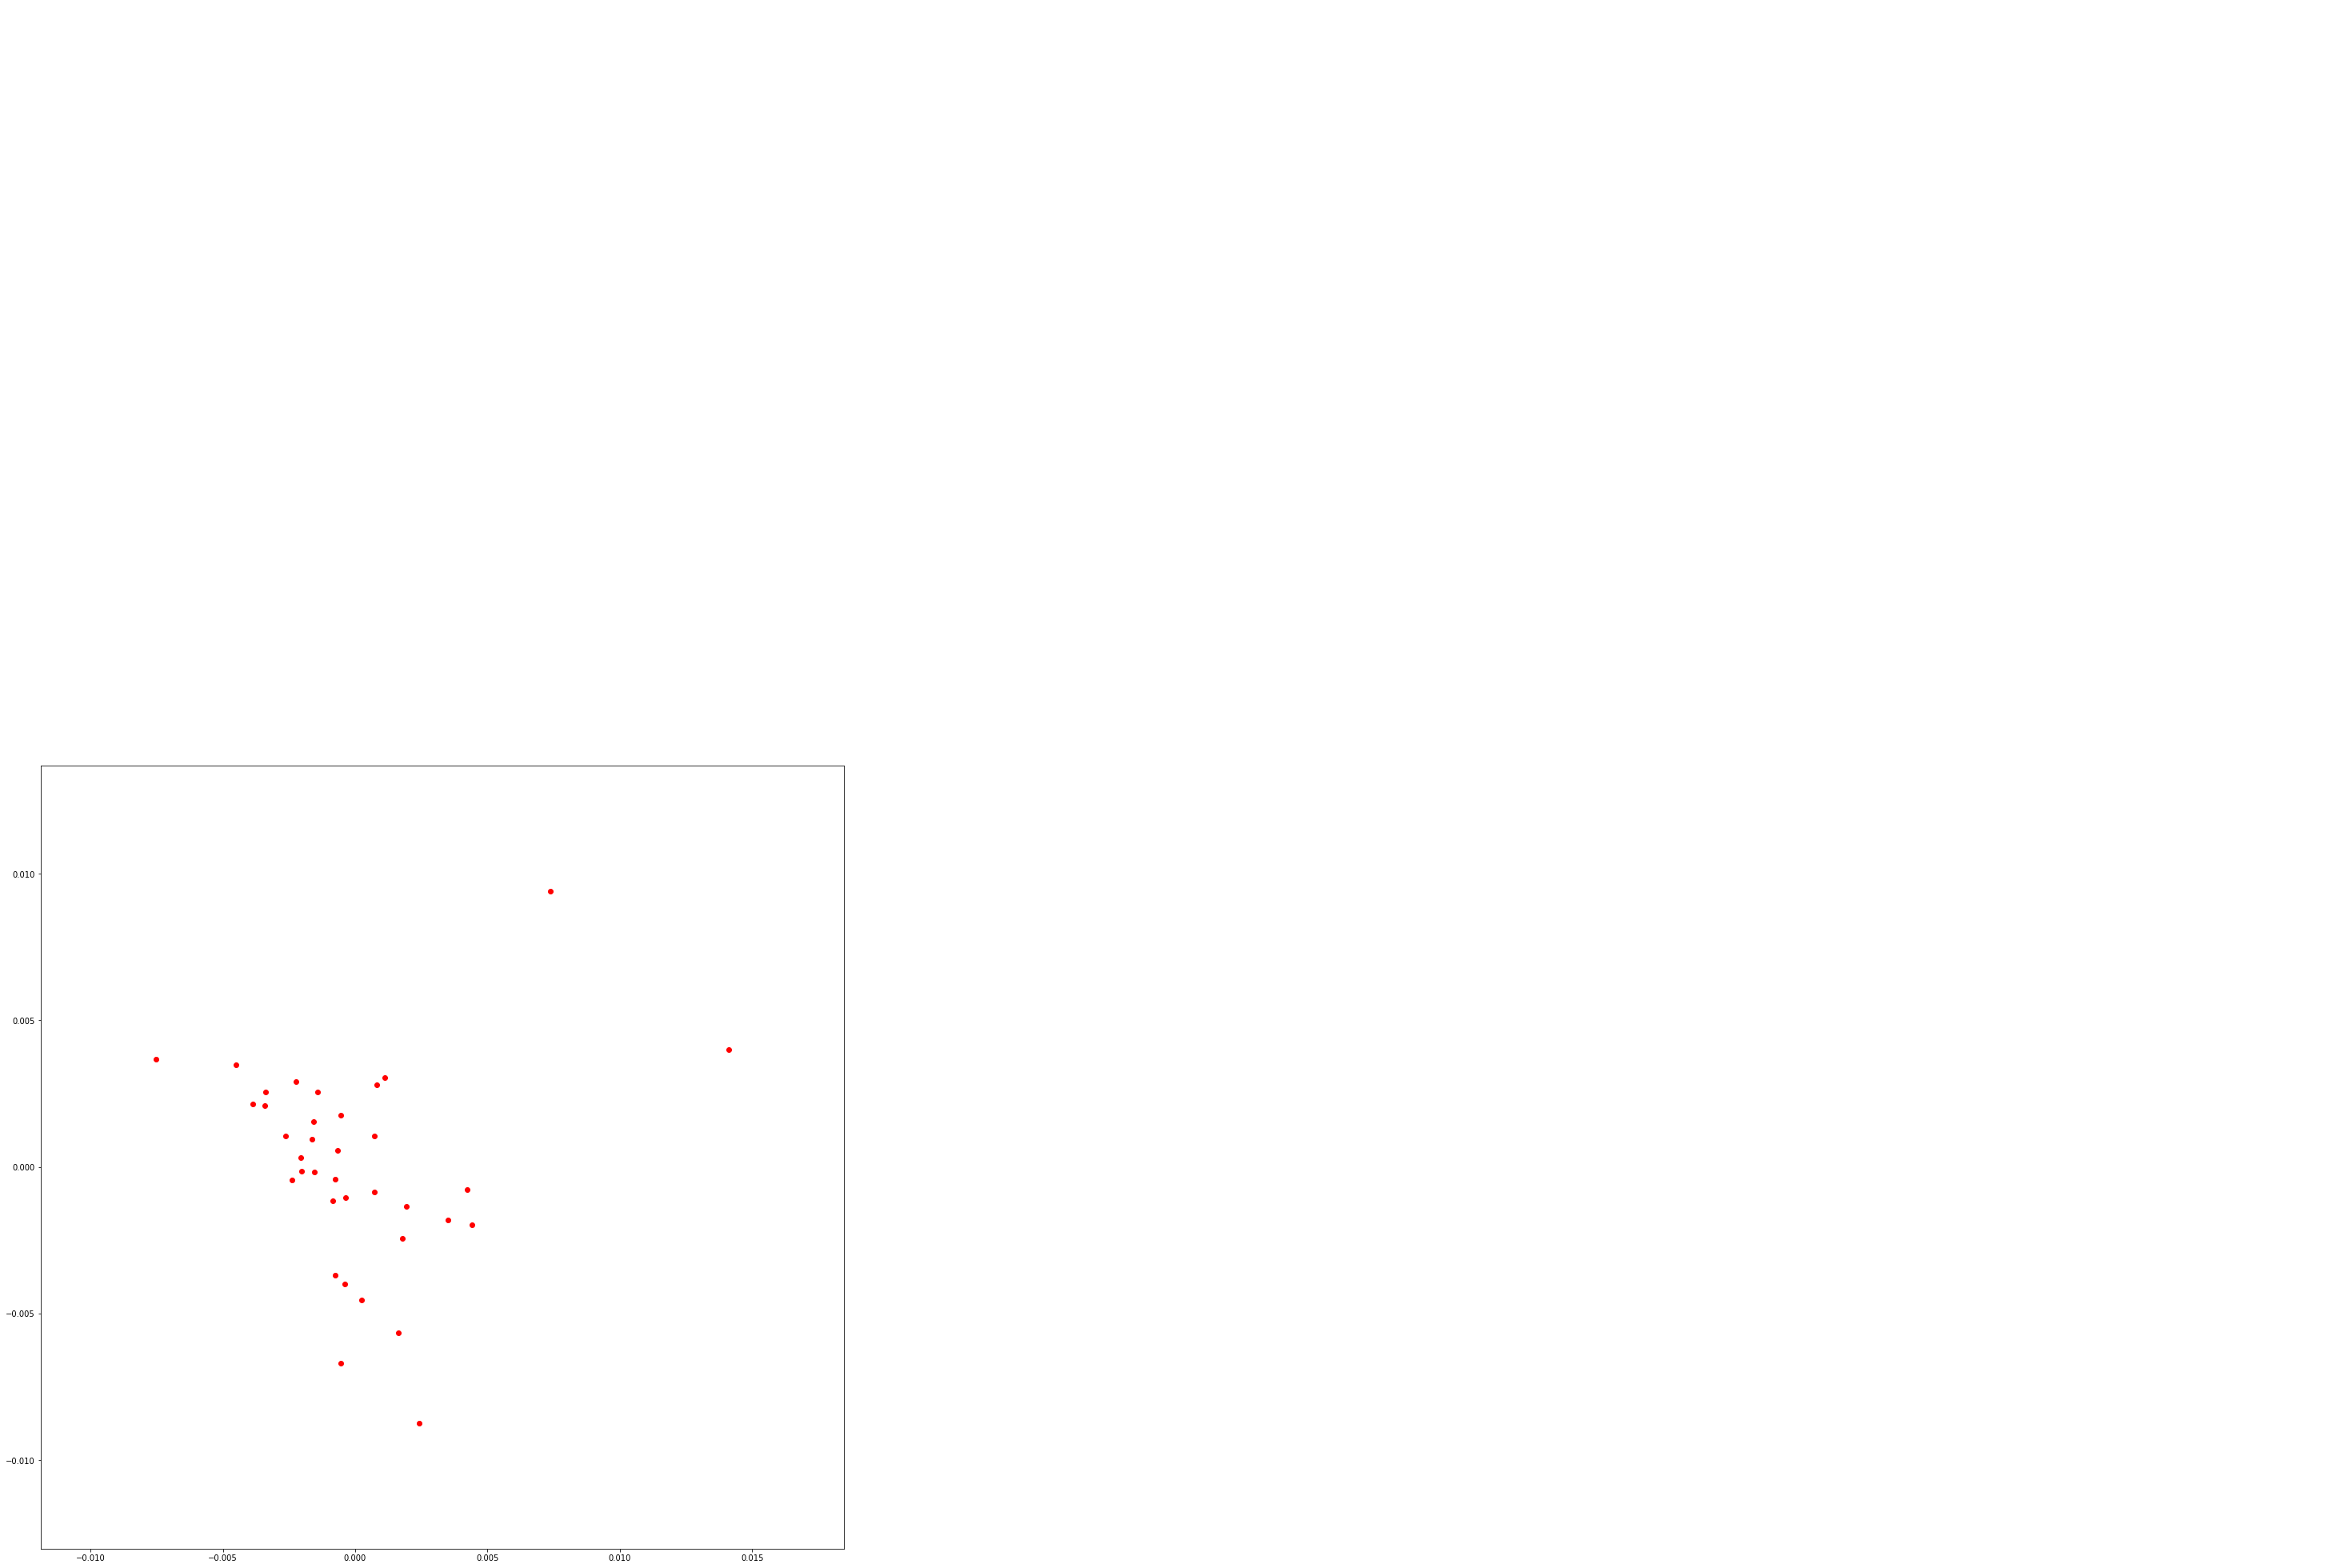

In [125]:
word_vectors = ft_model.wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

plt.figure(figsize=(18, 18))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')